In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-2-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]

In [4]:
cost_of_living_df

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,00000,United States,1.0,RPPs: All items,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,00000,United States,2.0,RPPs: Goods,99.3,99.2,99.0,99.0,99.0,99.0,99.0,99.0,99.0,98.9,98.9,98.8
2,00000,United States,3.0,RPPs: Services: Rents,101.1,101.2,102.0,101.9,101.8,101.8,101.7,101.7,101.8,101.8,102.0,102.0
3,00000,United States,4.0,RPPs: Services: Other,100.3,100.3,100.1,100.1,100.1,100.1,100.1,100.1,100.1,100.1,100.0,100.0
4,00999,United States (Nonmetropolitan Portion) 1/,1.0,RPPs: All items,86.6,86.8,87.3,87.5,87.8,88.2,88.1,88.0,87.9,87.9,87.3,86.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,49700,"Yuba City, CA (Metropolitan Statistical Area)",4.0,RPPs: Services: Other,97.6,99.3,100.2,100.8,101.3,102.8,102.0,101.5,101.6,101.2,101.6,102.2
1540,49740,"Yuma, AZ (Metropolitan Statistical Area)",1.0,RPPs: All items,93.3,94.8,94.2,95.1,93.9,94.0,92.9,92.1,90.1,88.8,88.3,87.8
1541,49740,"Yuma, AZ (Metropolitan Statistical Area)",2.0,RPPs: Goods,95.8,96.6,97.1,97.6,96.9,96.4,95.5,95.2,93.6,93.0,92.9,93.0
1542,49740,"Yuma, AZ (Metropolitan Statistical Area)",3.0,RPPs: Services: Rents,81.8,84.5,79.9,81.6,77.5,77.1,76.2,74.6,72.5,71.0,70.2,69.3


In [5]:
university_rankings = pd.read_pickle(DATA_DIR/ 'university_ranking_statistical_area.pickle')

In [6]:
university_rankings = university_rankings[university_rankings.CBSA.isnull() == False]

In [7]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,...,score,year,CSA,CITY,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS,CBSA
1200,1,Harvard University,USA,1,1,1,1,1,1,1,...,100.00,2015,148,Cambridge,MA,-71.118313,42.374471,Harvard University,,"Boston-Cambridge-Newton, MA-NH"
1201,2,Stanford University,USA,2,9,2,4,5,3,3,...,98.66,2015,488,Stanford,CA,-122.167359,37.429434,Stanford University,,"San Jose-San Francisco-Oakland, CA"
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,...,97.54,2015,148,Cambridge,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T.","Boston-Cambridge-Newton, MA-NH"


In [8]:
statistical_areas = np.array([i.split(' (')[0] for i in cost_of_living_df.GeoName.values])

In [9]:
RPP_list = [
    ['RPP_all','RPPs: All items'],
    ['RPP_goods','  RPPs: Goods'],
    ['RPP_rents','  RPPs: Services: Rents'],
    ['RPP_other','  RPPs: Services: Other'],
]

In [10]:
RPP_list[0]

['RPP_all', 'RPPs: All items']

In [11]:
for label, col in tqdm(RPP_list):
    RPP = []
    for idx, row in tqdm(university_rankings.iterrows(), total=len(university_rankings)):
        if type(row['CBSA']) is not str:
            print('No match: {}'.format(row.institution))
            RPP.append(np.nan)
            continue
        matching_stat_area = cost_of_living_df[statistical_areas == row['CBSA']]
        if len(matching_stat_area) == 0:
            print('RPP not found: {}'.format(row.institution))
            print('\t {}'.format(row.CBSA))
            RPP.append(np.nan)
            continue
        RPP.append(matching_stat_area[matching_stat_area.Description == col]['2019'].values[0])
    university_rankings[label] = RPP

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/224 [00:00<?, ?it/s]

RPP not found: Stanford University
	 San Jose-San Francisco-Oakland, CA
RPP not found: Washington University in St. Louis
	 St. Louis-St. Charles-Farmington, MO-IL
RPP not found: University of California, Davis
	 Sacramento-Roseville, CA
RPP not found: Vanderbilt University
	 Nashville-Davidson--Murfreesboro, TN
RPP not found: University of Maryland, College Park
	 Washington-Baltimore-Arlington, DC-MD-VA-WV-PA
RPP not found: University of Notre Dame
	 South Bend-Elkhart-Mishawaka, IN-MI
RPP not found: Georgia Institute of Technology
	 Klamath Falls, OR
RPP not found: Tufts University
	 Boston-Worcester-Providence, MA-RI-NH-CT
RPP not found: Arizona State University
	 Phoenix-Mesa, AZ
RPP not found: Stony Brook University
	 New York-Newark, NY-NJ-CT-PA
RPP not found: Indiana University-Purdue University Indianapolis
	 Indianapolis-Carmel-Muncie, IN
RPP not found: University of Georgia
	 Atlanta--Athens-Clarke County--Sandy Springs, GA-AL
RPP not found: University of Connecticut
	 Hartf

  0%|          | 0/224 [00:00<?, ?it/s]

RPP not found: Stanford University
	 San Jose-San Francisco-Oakland, CA
RPP not found: Washington University in St. Louis
	 St. Louis-St. Charles-Farmington, MO-IL
RPP not found: University of California, Davis
	 Sacramento-Roseville, CA
RPP not found: Vanderbilt University
	 Nashville-Davidson--Murfreesboro, TN
RPP not found: University of Maryland, College Park
	 Washington-Baltimore-Arlington, DC-MD-VA-WV-PA
RPP not found: University of Notre Dame
	 South Bend-Elkhart-Mishawaka, IN-MI
RPP not found: Georgia Institute of Technology
	 Klamath Falls, OR
RPP not found: Tufts University
	 Boston-Worcester-Providence, MA-RI-NH-CT
RPP not found: Arizona State University
	 Phoenix-Mesa, AZ
RPP not found: Stony Brook University
	 New York-Newark, NY-NJ-CT-PA
RPP not found: Indiana University-Purdue University Indianapolis
	 Indianapolis-Carmel-Muncie, IN
RPP not found: University of Georgia
	 Atlanta--Athens-Clarke County--Sandy Springs, GA-AL
RPP not found: University of Connecticut
	 Hartf

  0%|          | 0/224 [00:00<?, ?it/s]

RPP not found: Stanford University
	 San Jose-San Francisco-Oakland, CA
RPP not found: Washington University in St. Louis
	 St. Louis-St. Charles-Farmington, MO-IL
RPP not found: University of California, Davis
	 Sacramento-Roseville, CA
RPP not found: Vanderbilt University
	 Nashville-Davidson--Murfreesboro, TN
RPP not found: University of Maryland, College Park
	 Washington-Baltimore-Arlington, DC-MD-VA-WV-PA
RPP not found: University of Notre Dame
	 South Bend-Elkhart-Mishawaka, IN-MI
RPP not found: Georgia Institute of Technology
	 Klamath Falls, OR
RPP not found: Tufts University
	 Boston-Worcester-Providence, MA-RI-NH-CT
RPP not found: Arizona State University
	 Phoenix-Mesa, AZ
RPP not found: Stony Brook University
	 New York-Newark, NY-NJ-CT-PA
RPP not found: Indiana University-Purdue University Indianapolis
	 Indianapolis-Carmel-Muncie, IN
RPP not found: University of Georgia
	 Atlanta--Athens-Clarke County--Sandy Springs, GA-AL
RPP not found: University of Connecticut
	 Hartf

  0%|          | 0/224 [00:00<?, ?it/s]

RPP not found: Stanford University
	 San Jose-San Francisco-Oakland, CA
RPP not found: Washington University in St. Louis
	 St. Louis-St. Charles-Farmington, MO-IL
RPP not found: University of California, Davis
	 Sacramento-Roseville, CA
RPP not found: Vanderbilt University
	 Nashville-Davidson--Murfreesboro, TN
RPP not found: University of Maryland, College Park
	 Washington-Baltimore-Arlington, DC-MD-VA-WV-PA
RPP not found: University of Notre Dame
	 South Bend-Elkhart-Mishawaka, IN-MI
RPP not found: Georgia Institute of Technology
	 Klamath Falls, OR
RPP not found: Tufts University
	 Boston-Worcester-Providence, MA-RI-NH-CT
RPP not found: Arizona State University
	 Phoenix-Mesa, AZ
RPP not found: Stony Brook University
	 New York-Newark, NY-NJ-CT-PA
RPP not found: Indiana University-Purdue University Indianapolis
	 Indianapolis-Carmel-Muncie, IN
RPP not found: University of Georgia
	 Atlanta--Athens-Clarke County--Sandy Springs, GA-AL
RPP not found: University of Connecticut
	 Hartf

In [12]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,...,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS,CBSA,RPP_all,RPP_goods,RPP_rents,RPP_other
1200,1,Harvard University,USA,1,1,1,1,1,1,1,...,MA,-71.118313,42.374471,Harvard University,,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3
1201,2,Stanford University,USA,2,9,2,4,5,3,3,...,CA,-122.167359,37.429434,Stanford University,,"San Jose-San Francisco-Oakland, CA",NaN,NaN,NaN,NaN
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,...,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T.","Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3


In [13]:
university_rankings.to_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [14]:
university_rankings = university_rankings[university_rankings.RPP_all.isnull() ==False]

In [15]:
university_rankings = university_rankings.sort_values(by='national_rank')

In [16]:
smoothed = np.convolve(university_rankings.RPP_rents.values, np.ones(10)/10)

In [17]:
university_rankings.RPP_rents.values

array([143.6, 143.6, 151.8, 200.3, 112.4, 121. , 134.9, 107.1, 169.5,
       108.5, 169.5, 113.7, 151.8, 115.4, 172. , 112.4, 108.9, 200.3,
        91.7, 151.8, 120.9, 148.4,  83.7,  91.7,  98.6,  70.4,  78.9,
        86.6, 111.3,  57.6, 151.8, 169.5, 152. ,  91.3,  78.9, 169.1,
       143.6,  85.5, 109.4, 109.9,  92.3,  95.7,  97.2, 169.5, 104.7,
        84.7,  76.3,  86.4, 161.7,  80.4, 104.7, 104.7, 139. , 132.5,
       109.9,  91. , 109.9, 151.8,  69.4, 174.5,  78.5,  66.5, 127.1,
       151.8, 113.7,  87.8,  99.7, 104.7,  89.3,  86.1, 105.6,  78. ,
        83.4, 161.7, 112.4, 120.6,  86.6,  70.9,  71.3,  91.4, 104.7,
        84.2, 108.5,  80.1, 108.5,  95.8, 110.7,  96.9, 125.7,  79.9,
       143.6, 143.6, 102.8, 151.8,  91.4,  92.2,  77.6, 101.4,  81.7,
       112.4, 122.8,  97.9, 106. ,  85.3,  75.6, 172. , 104.7, 108.5,
       102.8, 109.5,  85.2,  98.3,  70.6,  76.7,  98.6, 139. ,  69.7,
       112.4,  77.8,  69.6, 108.1,  87.3,  82.5,  76.7, 112.4, 168.3,
        85.2, 113.7,

In [18]:
from scipy.stats import pearsonr

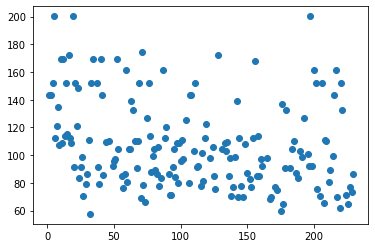

In [19]:
x = university_rankings.national_rank.values
y = university_rankings['RPP_rents']
fig, ax = plt.subplots()
ax.scatter(
    x,
    y
)
#plt.plot(smoothed)
#ax.set_yscale('log')

In [20]:
pearsonr(x,y)

(-0.2671473565562644, 0.00035173333016531166)

In [21]:
pearsonr(np.log(x),y)

(-0.3429988702186009, 3.373235964550399e-06)

In [22]:
import seaborn as sns

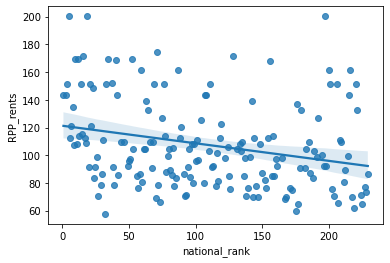

In [23]:
fig, ax = plt.subplots()
sns.regplot(x = "national_rank", y="RPP_rents", data=university_rankings, ax = ax)# logx=True, #
#ax.set_xscale('log')